In [2]:
import pandas as pd
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [3]:

# Load the images
image_with_people = cv2.imread('Images/1660824000.jpg')
empty_beach_image = cv2.imread('Images/1660798800.jpg')
empty_beach_image2 = cv2.imread('Images/1660802400.jpg')

In [4]:
def plot_fillter(fillter):
    plt.imshow(cv2.cvtColor(fillter, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.tight_layout()
    plt.show()

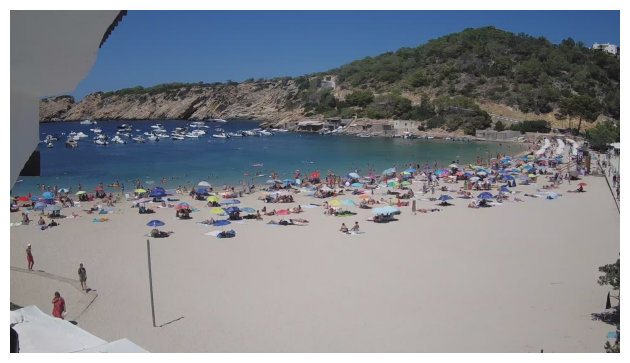

In [5]:
plot_fillter(image_with_people)

In [8]:
# Average empty beach image
avg_empty_image = cv2.addWeighted(empty_beach_image, 0.5, empty_beach_image2, 0.5, 0)


In [10]:
background_substraction = cv2.absdiff(image_with_people, avg_empty_image)


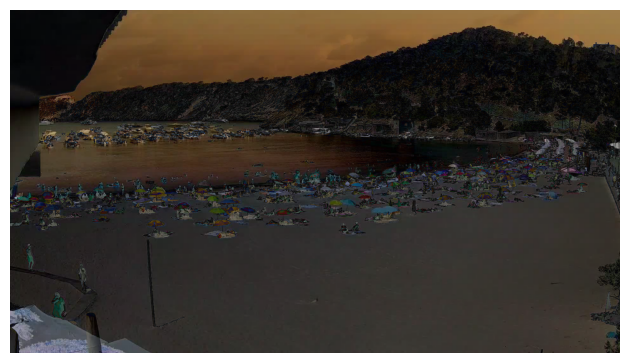

In [11]:
plot_fillter(background_substraction)

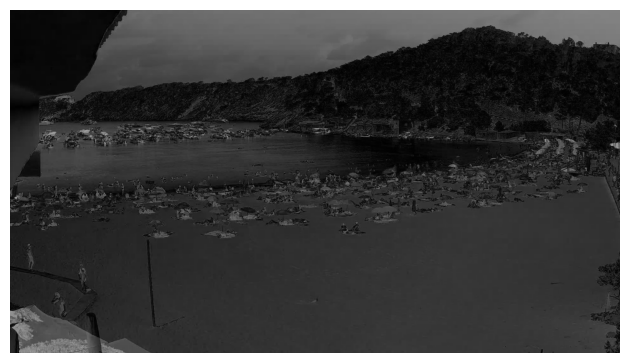

In [13]:
gray_bs = cv2.cvtColor(background_substraction, cv2.COLOR_BGR2GRAY)
plot_fillter(gray_bs)


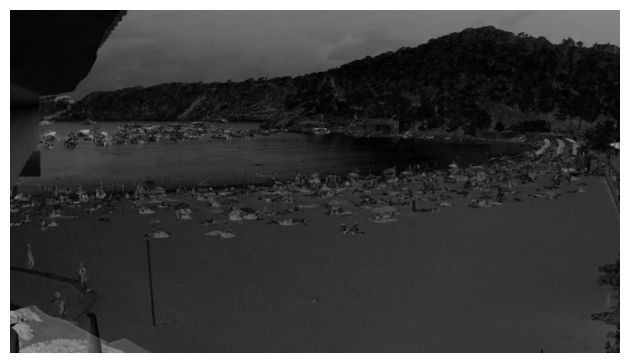

In [23]:
blured = cv2.medianBlur(gray_bs, 5,0)
plot_fillter(blured)

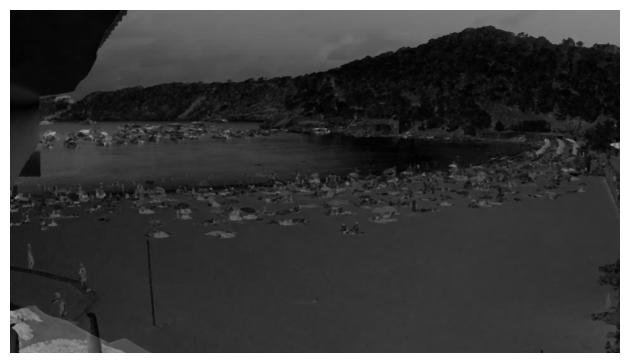

In [24]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
cleaned = cv2.morphologyEx(blured, cv2.MORPH_CLOSE, kernel)
plot_fillter(cleaned)

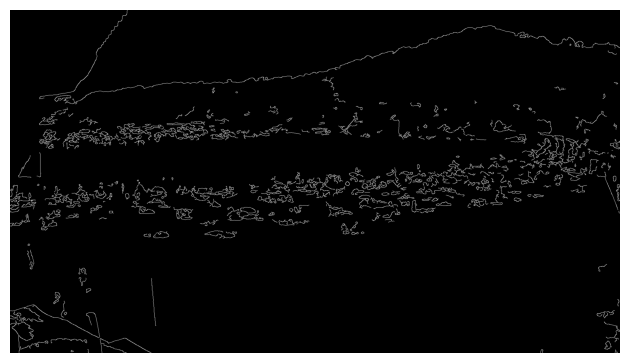

In [25]:
canny = cv2.Canny(cleaned,50,150)
plot_fillter(canny)

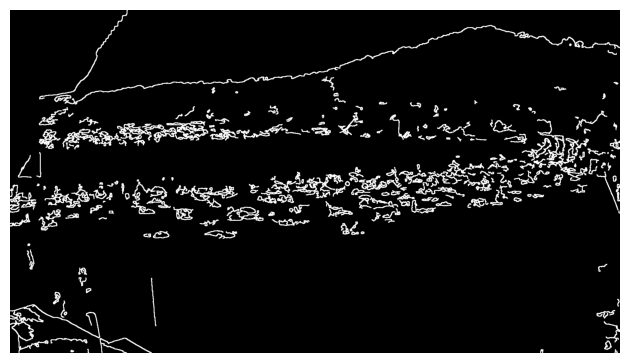

In [26]:
# define the kernel 
kernel = np.ones((3, 3), np.uint8) 
morph_gradient = cv2.morphologyEx(canny, 
                                  cv2.MORPH_GRADIENT,  
                                  kernel) 
plot_fillter(morph_gradient)

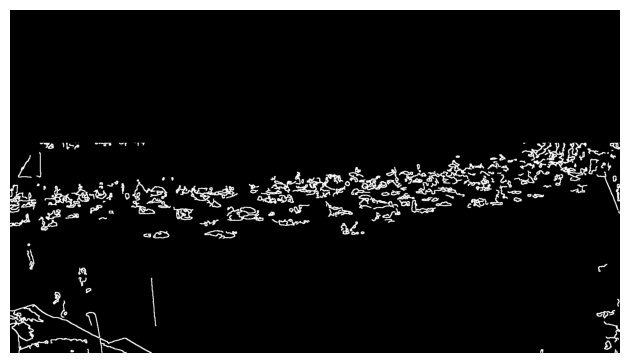

In [32]:
height, width = morph_gradient.shape
mask = np.ones((height, width), dtype=np.uint8)  # Initialize mask with all ones
mask[:7* height // 18, :] = 0  # Set top 1/3 of the mask to 0 (ignore this region)

# Apply the mask to the difference image
masked_third = cv2.bitwise_and(morph_gradient, morph_gradient, mask=mask)
plot_fillter(masked_third)

In [43]:

# Detect blobs (connected components)
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(masked_third)
output_image = image_with_people.copy()
for i in range(1, num_labels):  # Skip background (label 0)
    x, y, w, h, area = stats[i]
    if area > 350:  # Filter out small blobs
        cx, cy = int(centroids[i][0]), int(centroids[i][1])
        cv2.circle(output_image, (cx, cy), 10, (0, 0, 255), -1)  # Draw red dots on heads

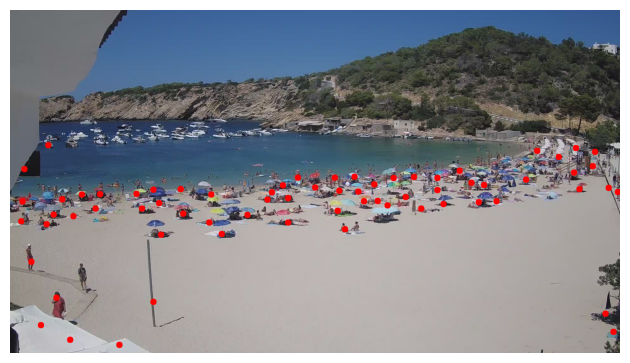

In [44]:
plot_fillter(output_image)